In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential([Dense(32, input_shape=(784,)), Activation('relu'), Dense(10), Activation('softmax'), ])

In [ ]:
model

In [ ]:
model.dtype

In [ ]:
# 对于具有2个类的单输入模型（二进制分类）
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000,100))
labels = np.random.randint(2, size=(1000,1))
print('data:', data.shape, '\nlabels:', labels.shape)

# 训练数据，以32个样本为一个batch进行迭代
model.fit(data, labels, epochs=50, batch_size=30)

In [ ]:
# 对于具有10个类的单输入模型（多分类分类）
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000,100))
labels = np.random.randint(10, size=(1000,1))

#将标签转换为十维的one-hot编码
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)
print('data:', data.shape, '\nlabels:', labels.shape)

# 训练数据，以32个样本为一个batch进行迭代
model.fit(data, one_hot_labels, epochs=550, batch_size=32)

In [ ]:
from keras.layers import Dropout
from keras.optimizers import SGD

In [ ]:
# 生成虚拟数据
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000,1)), num_classes=10)
x_test = np.random.random((100,20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 20))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=300, batch_size=50)

score = model.evaluate(x_test, y_test, batch_size=100)
print(score)

In [ ]:
# 基于多层感知器的二分类

# 生成虚拟数据
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

# 基于LSTM的序列分类

In [ ]:
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#print(model.layers[0].get_weights())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#model.summary()

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

In [ ]:
model1 = Sequential()
model1.add(Embedding(4,2,input_length=7))

model1.compile('rmsprop', 'mse')
model1.summary()

In [ ]:
data1 = np.array([[1,2,3,1,1,1,1], [1,2,3,3,3,3,3]])
print(data1)
model1.predict(data1)

# 基于栈式LSTM的序列分类

In [ ]:
data_dim = 16
timesteps = 8
num_classes = 10

# 期望输入数据的尺寸：(batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))# 返回维度为32的向量序列
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 生成虚拟数据
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# 生成虚拟验证数据
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

# keras函数式API

In [ ]:

# 全连接网络

from keras.layers import Input
from keras.models import Model

# 这部分返回一个张量
inputs = Input(shape=(784, ))

# 层的实例是可调用的，它以张量为参数，并返回一个张量
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#print(type(data), labels)
data = np.random.random((1000, 784))
labels = np.random.random((1000, 10))
model.fit(data, labels, epochs=10, batch_size=20)

In [ ]:
model.save('./test.hdf5')

In [ ]:
model.to_json()

In [ ]:
#模型的保存和加载
model.save('./111.h5')
from keras.models import load_model
model = load_model('./111.h5')

# keras模型的一些方法
model.layers#包含模型网络层的展平列表
model.inputs#模型输入张量的列表
model.outputs#模型输出张量的列表
model.summary()#打印模型概述信息
model.get_config()#返回包含模型配置信息的字典。通过下面的代码，可以根据配置信息重新实例化模型
config = model.get_config()
model = Model.from_config(config)
# 或者对于Sequential
model = Sequential.from_config(config)

model.get_weights()#返回模型中所有张量的列表，类型为Numpy数组
model.set_weights(weights)#从numpy数组中为模型设置权重，列表中的数组必须与get_weights()返回的权重具有想通的尺寸。
model.to_json()#以JSON字符串的形式返回模型的表示。

#使用以下方式从JSON字符串重新实例化模型
from keras.models import model_from_json

m_json = model.to_json()
model = model_from_json(m_json)

model.to_yaml()#以YAML字符串形式返回模型的表示。注意，该表示不包括权重，只包括结构。

#以下方式通过YAML重新实例化模型，使用重新初始化的权重
from keras.models import model_from_yaml
m_yaml = model.to_yaml()
model = model_from_yaml(m_yaml)

model.save_weights('filepath')#将模型权重存储为HDF5文件
model.load_weights('filepath', by_name=False)#从HDF5文件（由save_weights创建）中加载权重。默认下，模型结构不变。如果想加载进不同结构的模型，可以使用参数by_name=True，加载同名层的权重。

# Day2

In [ ]:
from tensorflow import keras

# 多输入多输出模型
函数式API使处理大量交织的数据流变得容易
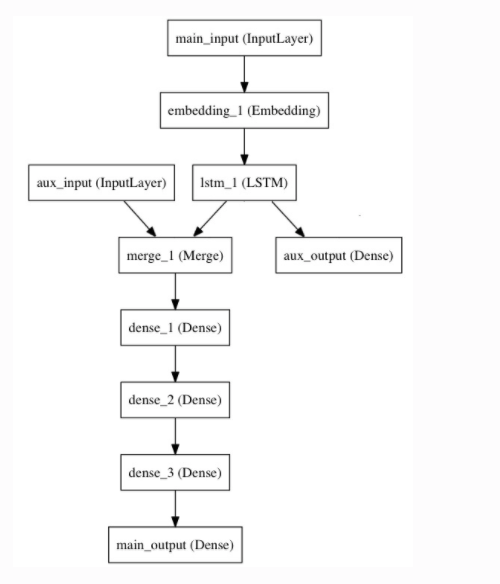

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

# 标题输入：接受一个含有100个整数的序列，每个整数在1到10000之间
# 注意我们可以通过传递一个“name”参数来命名任何层
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# Embedding层将输入序列编码为一个稠密向量的序列，每个向量维度为512
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM层把向量序列转换成单个向量，它包含整个序列的上下文信息
lstm_out = LSTM(32)(x)

# 在这里，我们插入辅助损失，使得即使在模型主损失很高的情况下，LSTM层和Embedding层都能被平稳地训练
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

# 此时，我们将辅助输入数据与LSTM层的输出链接起来，输入到模型中：
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# 堆叠多个全连接网络层
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 最后添加主要的逻辑回归层
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [ ]:
#然后定义一个具有两个输入和两个输出的模型
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

# 现在编译模型，给辅助损失分配0.2的权重，如果要为不同的输出指定不同的loss_weights或loss，可以使用列表或字典，
# 这里我们给loss参数传递单个损失函数，将这个损失用于所有的输出
model.compile(optimizer='rmsprop', loss='binary_crossentropy', loss_weights=[1., 0.2])

In [ ]:
model.fit([headline_data, additional_data], [labels, labels], epochs=50, batch_size=32)

# 由于我们通过name参数为输入、输出层进行了命名，所以可通过一下方式进行训练
model.compile(optimizer='rmsprop',
                loss={'main_input': 'binary_crossentropy', 'aux_input': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2}
             )

model.fit({'main_input': headline_data, 'auxiliary_input': additional_data}, 
          {'main_output': labels, 'auxiliary_output': labels}, 
          epochs=50,
          batch_size=32
         )


# 模型的一些常用的方法

In [ ]:
model.layers # 包含模型网络层的展平列表
model.inputs # 模型输入张量的列表
model.outputs # 模型输出张量的列表
model.summary() # 打印模型概述信息
model.get_config() # 返回包含模型配置信息的字典

# Keras网络层
网络层（layer）有很多共同的函数

In [ ]:
layer = Dense(32)

weights = layer.get_weights()  # 以含有Numpy矩阵的列表形式返回层的权重
layer.set_weights(weights) # 从含有Numpy举证的列表中设置层的权重

config = layer.get_config() # 返回包含层配置的字典
reconstructed_layer = Dense.from_config(config)

# 或者如下
from tensorflow.keras import layers

config = layer.get_config()
layer = layers.deserialize({'class_name': layer.__class__.__name__, 'config': config})

In [ ]:
layer.input

In [ ]:
model.input

In [ ]:
model.summary()

# keras的循环层RNN

In [1]:
keras.layers.RNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)

NameError: name 'keras' is not defined